In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
# %%capture
# !aws s3 cp --recursive s3://iryna-sandbox/deep-azulejo/synthetic_dataset_20200919 dataset_augmented

In [11]:
from fastai.vision import *
from fastai.vision.gan import *

In [12]:
path = 'dataset_augmented' # has 347635 images

In [13]:
def get_data(bs, size):
    return (GANItemList.from_folder(path, noise_sz=100)
               .split_none()
               .label_from_func(noop)
               .transform(tfms=[], size=size, tfm_y=True)
               .databunch(bs=bs)
               .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True))

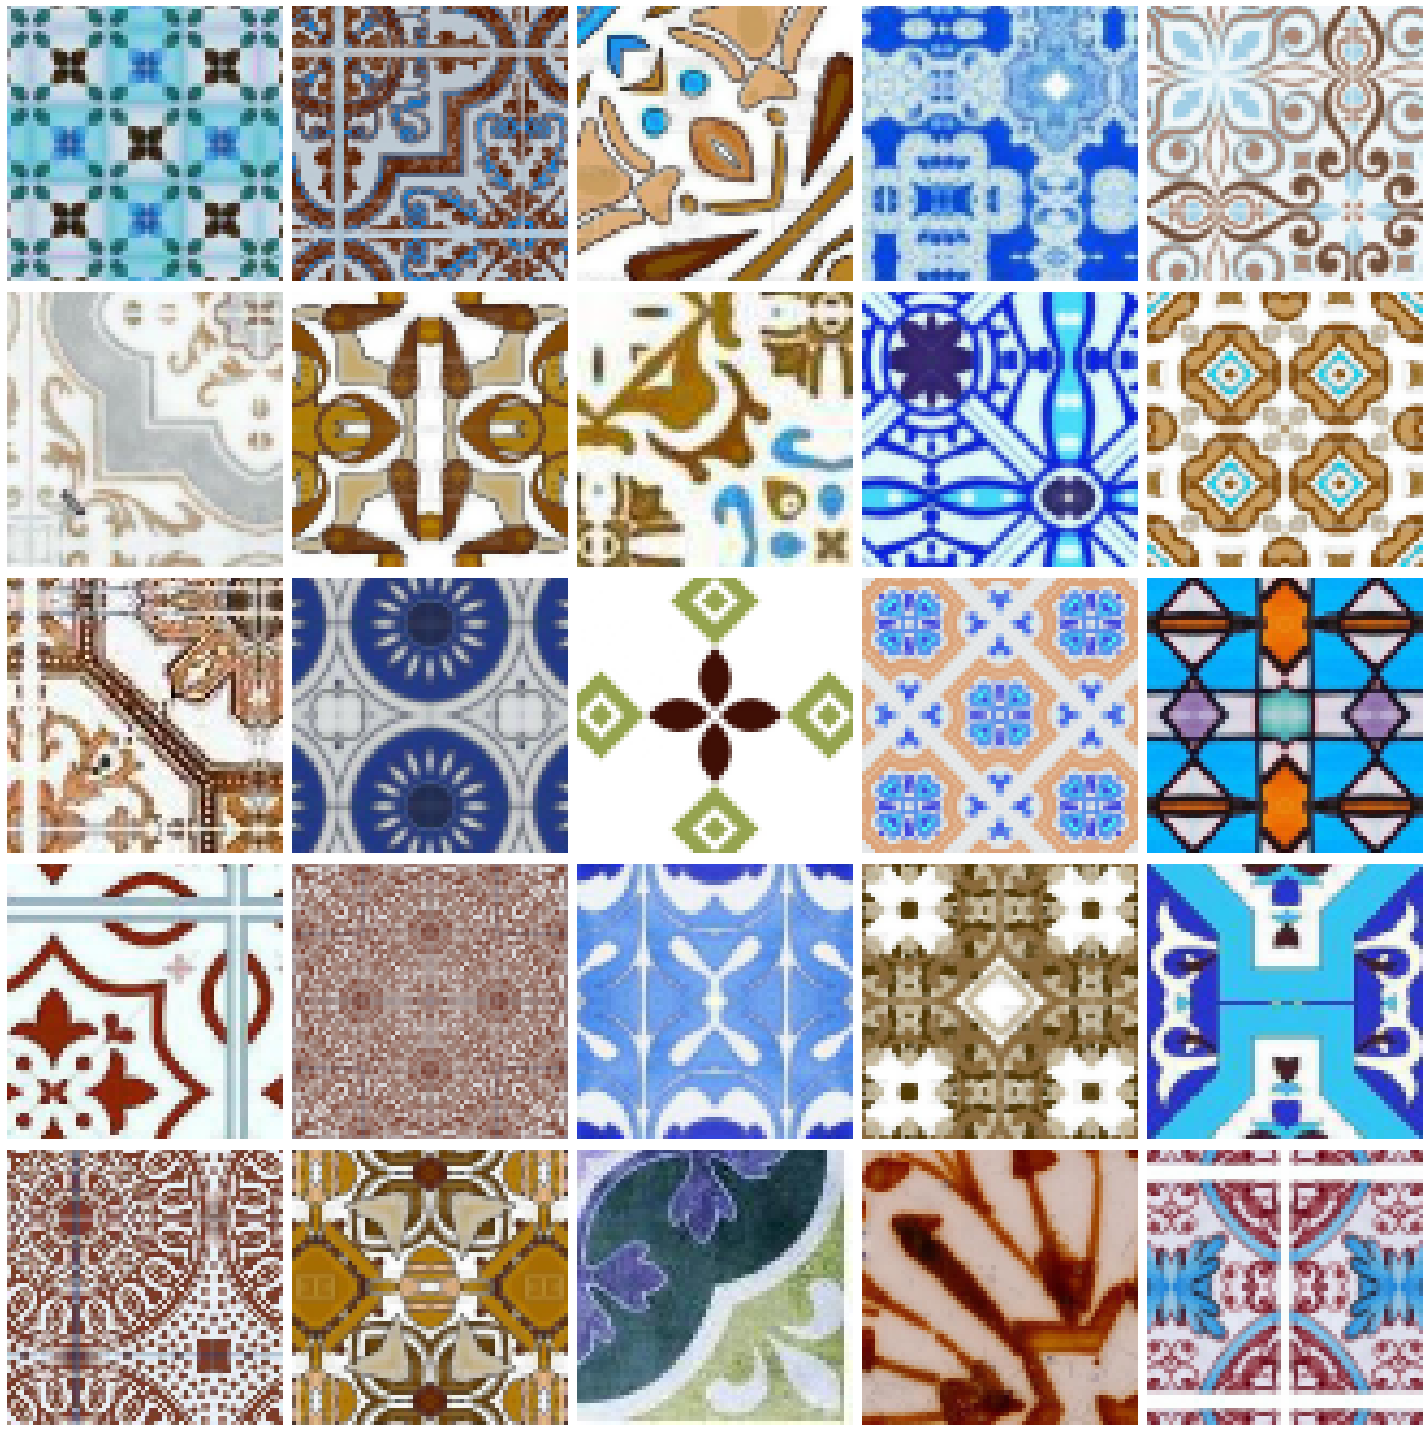

In [14]:
data = get_data(128, 64)
data.show_batch(rows=5)

In [15]:
generator = basic_generator(in_size=64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (in_size=64, n_channels=3, n_extra_layers=1)

In [16]:
learn = GANLearner.wgan(data, generator, critic, switch_eval=False,
                        opt_func = partial(optim.Adam, betas = (0.,0.99)), wd=0.)

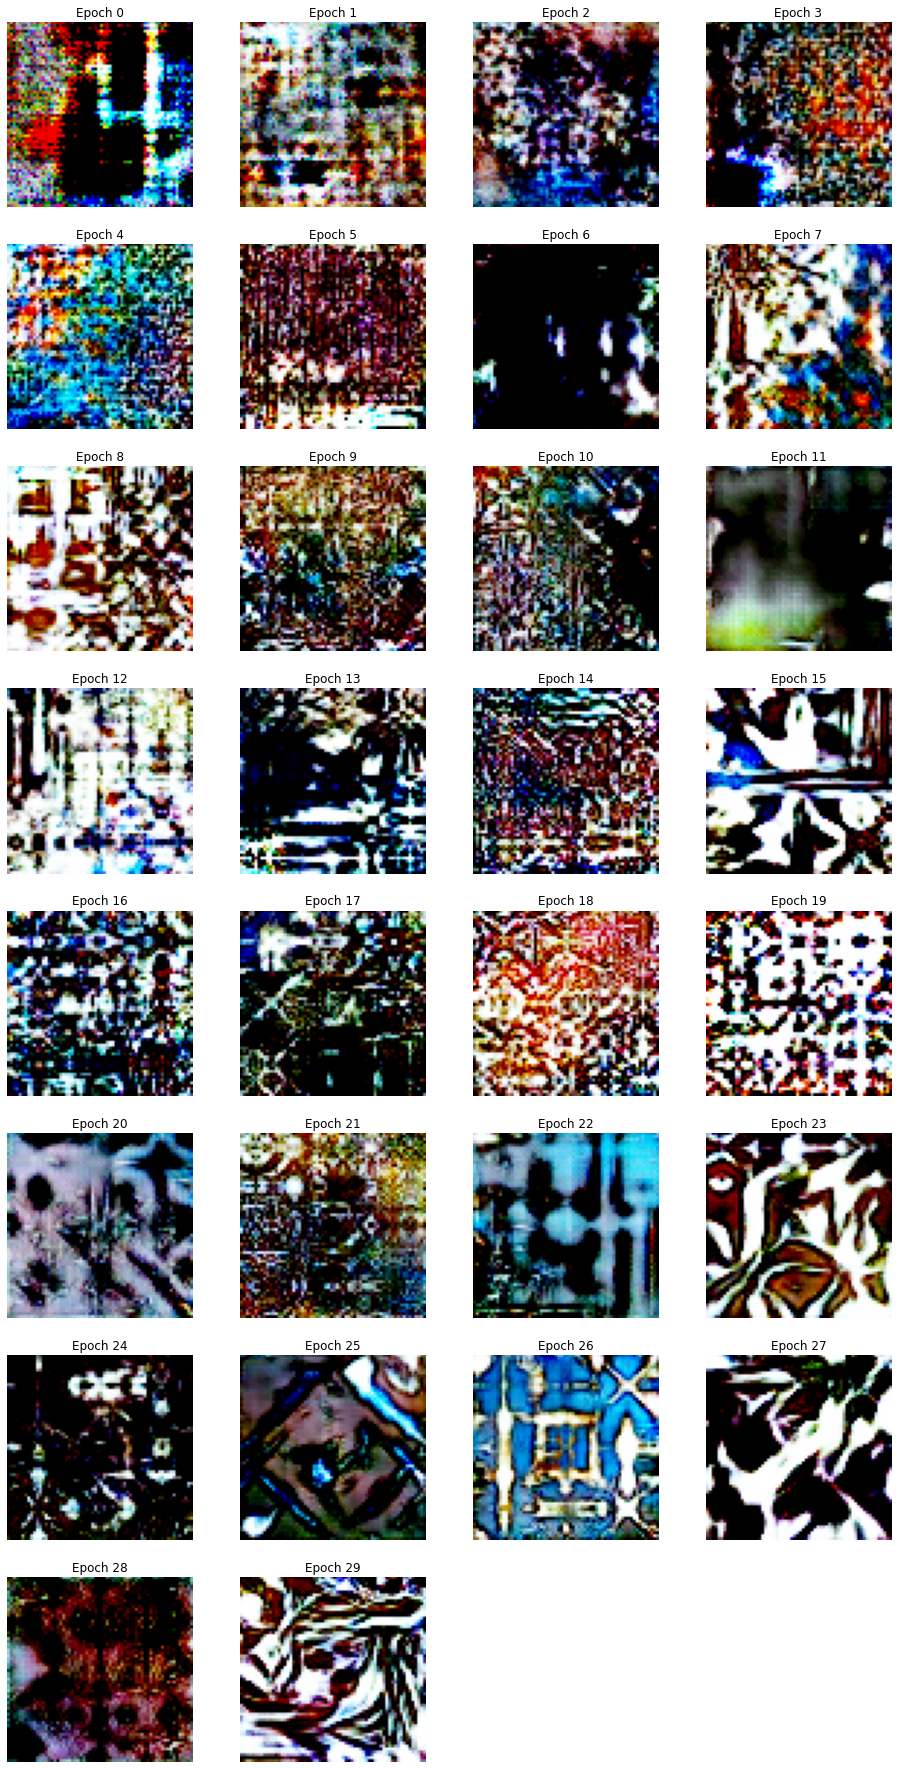

In [ ]:
learn.fit(30,2e-4)

Let's see some results!

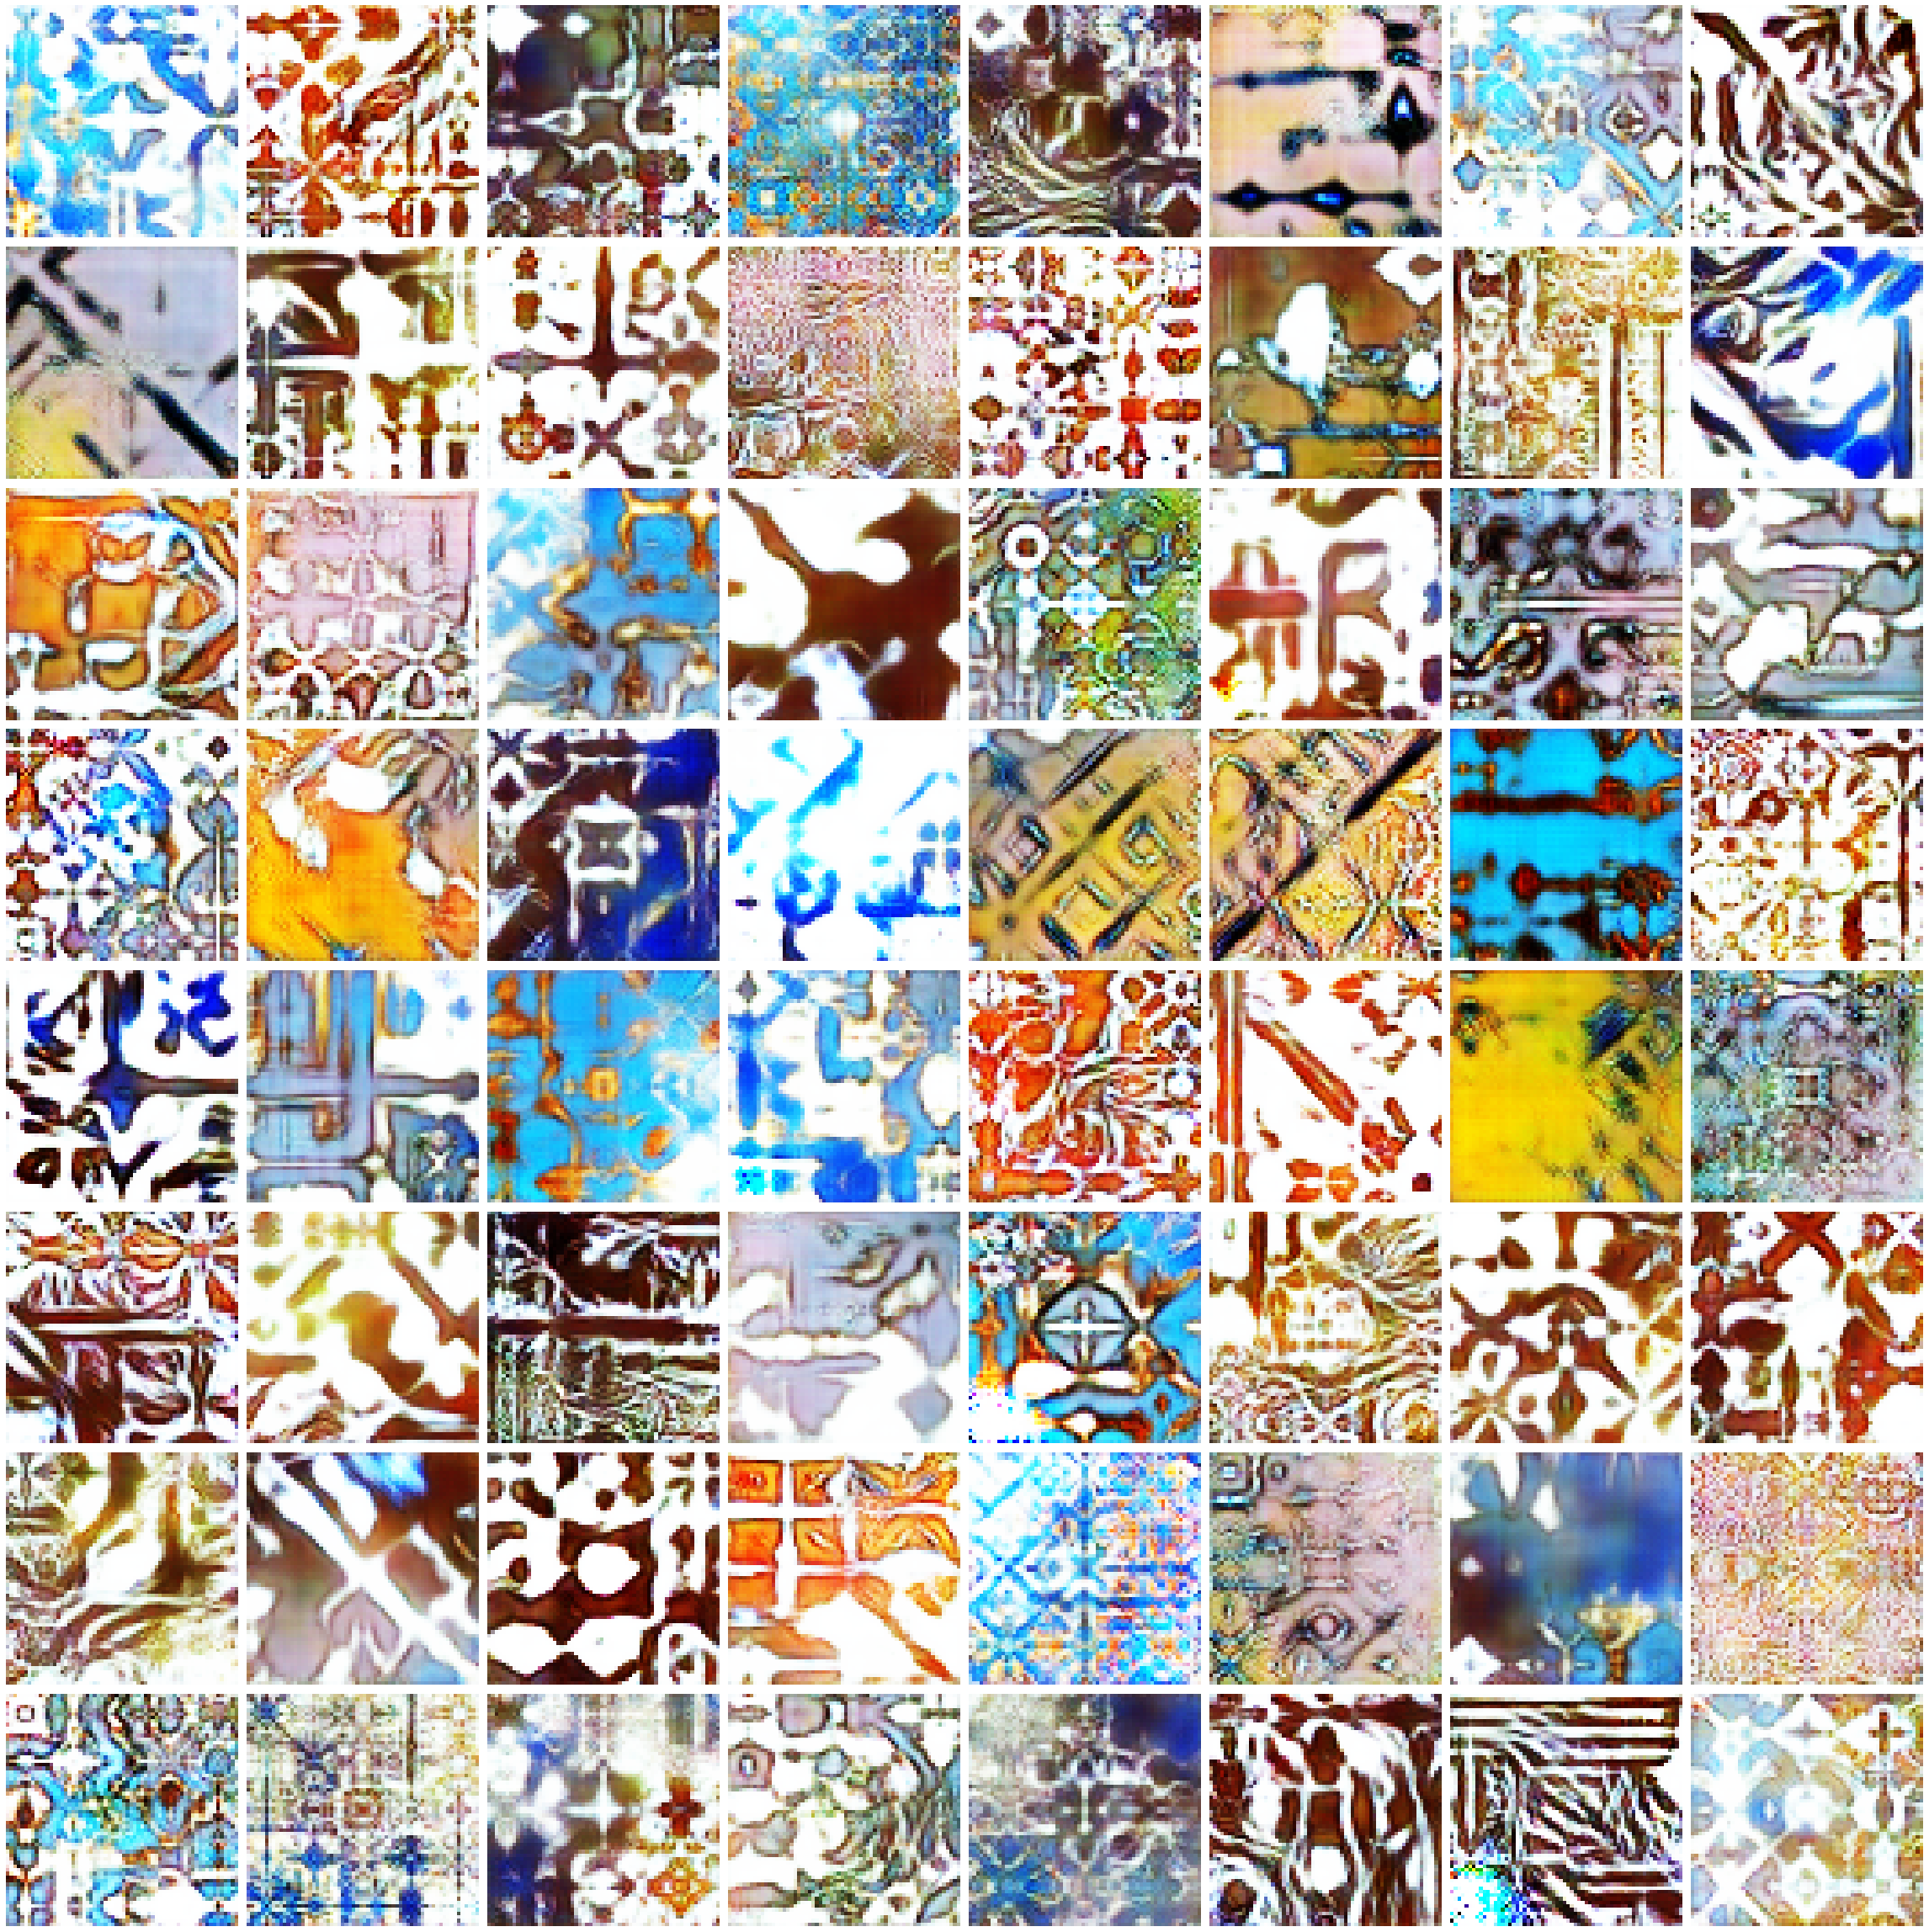

In [33]:
learn.show_results(ds_type=DatasetType.Train, rows=8, figsize=(32,32))

In [28]:
learn.save("fast_ai_v1.pkl")

And just to be sure, because pickles make me uneasy:

In [36]:
torch.save(learn.model.state_dict(), '/home/ec2-user/SageMaker/deep-azulejo/models/fastai_v1.pth')

The results look promising, and I think it would be possible to get better ones by training longer. But it already took 45 hours (on ml.m5.4xlarge Sagemaker notebook instance), which is a lot of hours! I'll try creating a little more custom pytorch solution first before waiting another 45 hours. 